# Least Squares

This is a python implementation of the linear least squares classification algorithms presented in Section 2.3.1.

First, let's define the notations used in this example:
   * $\textbf{X}$ is a matrix of inputs with size $N \times p$, where $N$ is the number of obervations and $p$ is the number of columns/ features / dimension.
       * Note that 
       $$\textbf{X} = \begin{bmatrix}x_{11} & x_{12} & \cdots & x_{1p}\\
                                     x_{21} & x_{22} & \cdots & x_{2p}\\
                                     \vdots & \cdots & \cdots & \vdots\\
                                     x_{N1} & \cdots & \cdots & x_{Np}
                      \end{bmatrix}
       $$
       where $x_{ij}$ denotes the $i^{th}$ observation (row) of the $j^{th}$ feature of $\textbf{X}$ and $X_k$ denotes the $k^{th}$ column of $\textbf{X}$.
   * $\textbf{Y}$ is a matrix of outputs with size $N \times q$, where $q$ is the number of outputs. In this example, we have only one output.
   * $\beta = [\beta_1, \beta_2, \cdots, \beta_p]^\top$ is a vector of parameters with size $p$.
   * Any variables with a  $\hat{}$ on top  denote predicted / estimated variables.
   * $\textbf{e}$ denotes a vector of ones with an appropriate size.

### Linear model in matrix form
Now, let's define our least squares problem.

Given a vector of inputs $\textbf{X}$, the linear model is constructed as:
$$\begin{equation}\textbf{Y} = \textbf{X}\beta + \textbf{e}\beta_0 + \epsilon\end{equation}$$
where $\beta_0$ is the intercept/offset (bias in machine learning), $\epsilon$ is a vector of unobserved disturbances, and $\textbf{e}$ is a vector of ones with size $N$.
It is convenient to absorb $\beta_0$ into $\beta$ such that:

$$\textbf{Y} = [\textbf{e}, X_1, X_2, ... X_p] \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots\\ \beta_p\end{bmatrix} + \epsilon = \textbf{X}\beta + \epsilon$$

### Residuals and the least squares criterion
If $\hat\beta$ is a vector of estimates of the actual $\beta$, then the prediction model can be written as
$$\textbf{Y} = \textbf{X}\hat\beta + e$$
where $e$ is a vector of residual or error between $\textbf{Y}$ and $\hat{\textbf{Y}}$.

The residual/error $e$ can be computed using the data and $\hat\beta$ by means of
$$e=\textbf{Y}-\textbf{X}\beta$$
The most popular method to fit the linear model to the training data is *least squares*, which minimizes the residual sum of squares (RSS) of errors w.r.t to $\beta$:

$$\begin{aligned}RSS(\beta)&=\sum_{i=1}^N e_i^2=\sum_{i=1}^N (Y_i - X_{i, :}\beta)^2\\ 
&= (\textbf{Y} - \textbf{X}\beta)^\top(\textbf{Y} - \textbf{X}\beta)\\&=\textbf{Y}^\top\textbf{Y}-\textbf{Y}^\top\textbf{X}\beta-\beta^\top\textbf{X}^\top\textbf{Y} + \beta^\top\textbf{X}^\top\textbf{X}\beta\end{aligned}$$
To compute $\beta$ that minimizes the $RSS(\beta)$:
$$\frac{\partial RSS(\beta)}{\partial\beta} = -2\textbf{X}^\top\textbf{Y}+2\textbf{X}^\top\textbf{X}\beta=0$$
which gives the normal equation
$$\textbf{X}^\top\textbf{X}\beta=\textbf{X}^\top\textbf{Y}$$

Solving this for $\beta$, we obtain:
$$\beta = (\textbf{X}^\top\textbf{X})^{-1}\textbf{X}^\top\textbf{Y}$$

provided that $(\textbf{X}^\top\textbf{X})^{-1}$ exists, or in other words $\textbf{X}$ should have rank $p$. In particular, this requires that $N\geq p$ (number of observations is greater than or equal the number of parameters).

### Python's implementation using Mixture dataset

In [1]:
import sys
import numpy as np
from ml_datasets.esl import Mixture
from ml_datasets.utils import plot_2D

In [2]:
# loading dataset
mixture = Mixture()
x, y = mixture.load()

Retrieving ESL-Mixture dataset...
C:\Users\mzyskk\AppData\Local\Temp\ESL\ESL.mixture.rda available locally, skip downloading


In [3]:
# check the input and output shapes
print("x: {}, y: {}".format(x.shape, y.shape))

x: (200, 2), y: (200,)


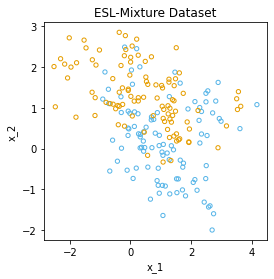

In [4]:
# visualize the data
plt = plot_2D(x, y, "ESL-Mixture Dataset", axis='on')

In [5]:
# append intercept in the input x, so x = [1, x1, x2]
x = np.concatenate((np.ones_like(x[:, 0].reshape(-1, 1)), x), axis=1)

Solution of the least square is: $\hat\beta = (\textbf{X}^\top \textbf{X})^{-1} \textbf{X}^\top \textbf{Y}$

In [6]:
# check if dot(x.T, x) is invertible
if np.linalg.cond(np.dot(x.T, x)) < 1/sys.float_info.epsilon:
    beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
else:
    print("dot(x.T, x) is ill-conditioned")
    sys.exit()

The estimated output is given as $\hat{\textbf{Y}} = \textbf{X}\hat\beta$

In [7]:
y_hat = np.dot(x, beta_hat)

And the final classification output is given as:

$\hat{\textbf{G}} = \begin{cases}
    \color{orange}{\text{ORANGE}} \color{black}{\text{ or 1}}, & \text{if } \hat{\textbf{Y}} > 0.5\\
    \color{blue}{\text{BLUE}} \color{black}{\text{ or 0}},              & \text{if } \hat{\textbf{Y}} \leq 0.5
\end{cases}$

In [8]:
threshold = 0.5
G_hat = np.array([1 if y_hat_ > threshold else 0 for y_hat_ in y_hat]).astype(int)

The decision boundary is given as $\hat{\textbf{Y}} = 0.5\textbf{e} = \textbf{X} \hat\beta =  \beta_0\textbf{e} + X_1\beta_1 + X_2\beta_2$, which implies $X_2 = -\frac{\hat\beta_1}{\hat\beta_2} X_1+ \frac{0.5\textbf{e}}{\hat\beta_2} - \frac{\hat\beta_0}{\hat\beta_2}, \forall X_1 \in \mathcal{R}$

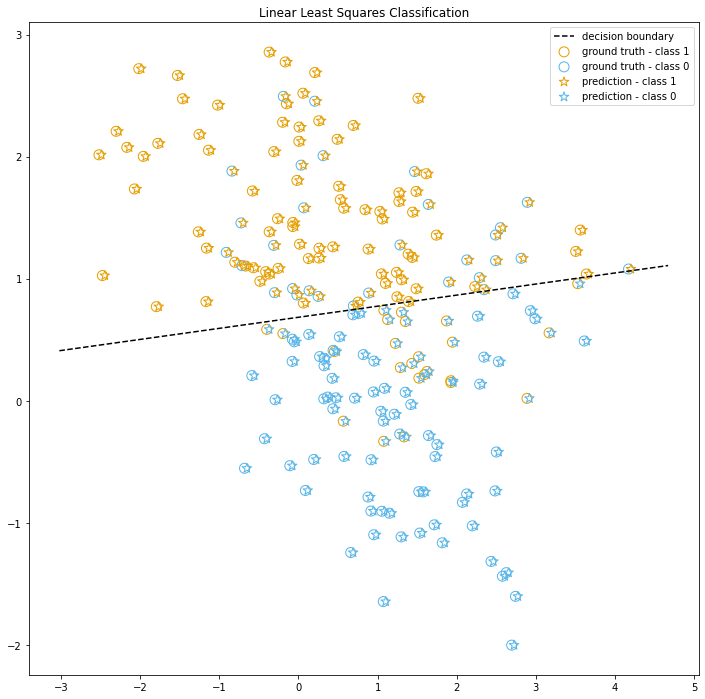

In [9]:
# plot the classification results and decision boundary
BLUE, ORANGE = "#57B5E8", "#E69E00"
x_1 = np.linspace(min(x[:, 1]) - 0.5, max(x[:, 1]) + 0.5,100)
x_2 = - (beta_hat[1] / beta_hat[2]) * x_1 + (threshold / beta_hat[2]) - (beta_hat[0] / beta_hat[2])
plt.figure(figsize=(12, 12))
plt.scatter(x[:, 1][y==1], x[:, 2][y==1], s=100, marker="o", edgecolors=ORANGE, facecolors="none", label='ground truth - class 1')
plt.scatter(x[:, 1][y==0], x[:, 2][y==0], s=100, marker="o", edgecolors=BLUE, facecolors="none", label='ground truth - class 0')
plt.scatter(x[:, 1][G_hat==1] + 0.03, x[:, 2][G_hat==1], s=100, marker="*", edgecolors=ORANGE, facecolors="none", label='prediction - class 1')
plt.scatter(x[:, 1][G_hat==0] + 0.03, x[:, 2][G_hat==0], s=100, marker="*", edgecolors=BLUE, facecolors="none", label='prediction - class 0')
plt.plot(x_1, x_2, '--k', label='decision boundary')
plt.legend()
plt.title("Linear Least Squares Classification")
plt.show()